In [2]:
## Option 1: Pyber

![Ride](Images/Ride.png)

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.
* See [Example Solution](Pyber/Pyber_Example.pdf) for a reference on expected format.


SyntaxError: invalid syntax (<ipython-input-2-637f2ee98003>, line 5)

In [30]:
%matplotlib notebook
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [5]:
# Read CSV
ride_CSV = pd.read_csv("HOMEWORK/Instructions/Pyber/raw_data/ride_data.csv")
print(ride_CSV.head())

city_CSV = pd.read_csv("HOMEWORK/Instructions/Pyber/raw_data/city_data.csv")
city_CSV.head()

                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
# Average Fare ($) Per City
rides_per_city_df = ride_CSV.groupby('city')
avg_rides = rides_per_city_df['fare'].mean()
avg_rides = pd.DataFrame(avg_rides)

avg_rides.head()

,fare
city,
Amandaburgh,24.641667
Barajasview,25.332273
Barronchester,36.422500
Bethanyland,32.956111
Bradshawfurt,40.064000


In [7]:
# Total Number of Rides Per City
city_rides = rides_per_city_df['fare'].count()
city_rides = pd.DataFrame(city_rides)
city_rides.head()

,fare
city,
Amandaburgh,18
Barajasview,22
Barronchester,16
Bethanyland,18
Bradshawfurt,10


In [8]:
# Total Number of Drivers Per City
city_drivers = city_CSV[['city','driver_count']]
city_drivers = pd.DataFrame(city_drivers)
city_drivers=city_drivers.set_index('city')
city_drivers.head()

,driver_count
city,
Richardfort,38
Williamsstad,59
Port Angela,67
Rodneyfort,34
West Robert,39


In [9]:
# City Type (Urban, Suburban, Rural)
city_type = city_CSV[['city','type']]
city_type = pd.DataFrame(city_type)
city_type=city_type.set_index('city')
city_type.head()

,type
city,
Richardfort,Urban
Williamsstad,Urban
Port Angela,Urban
Rodneyfort,Urban
West Robert,Urban


In [43]:
city_df= pd.DataFrame({
    "number_of_rides": city_rides['fare'],
    "average_fare": avg_rides['fare'],
    "number_of_drivers": city_drivers['driver_count'],
    "type": city_type['type']
})
#city_df = city_df.set_index(city_df['type'])


city_df.head()

,number_of_rides,average_fare,number_of_drivers,type
Amandaburgh,18,24.641667,12,Urban
Barajasview,22,25.332273,26,Urban
Barronchester,16,36.422500,11,Suburban
Bethanyland,18,32.956111,22,Suburban
Bradshawfurt,10,40.064000,7,Rural


In [44]:
#create Data x, y, z

urban_df = city_df[city_df['type'] == 'Urban']
suburban_df = city_df[city_df['type'] == 'Suburban']
rural_df = city_df[city_df['type'] == 'Rural']
rural_df

,number_of_rides,average_fare,number_of_drivers,type
Bradshawfurt,10,40.064000,7,Rural
Garzaport,3,24.123333,7,Rural
Harringtonfort,6,33.470000,4,Rural
Jessicaport,6,36.013333,1,Rural
Lake Jamie,6,34.358333,4,Rural
Lake Latoyabury,11,26.061818,2,Rural
Michaelberg,12,34.997500,6,Rural
New Ryantown,6,43.278333,2,Rural
Newtonview,4,36.745000,1,Rural
North Holly,9,29.130000,8,Rural


<IPython.core.display.Javascript object>


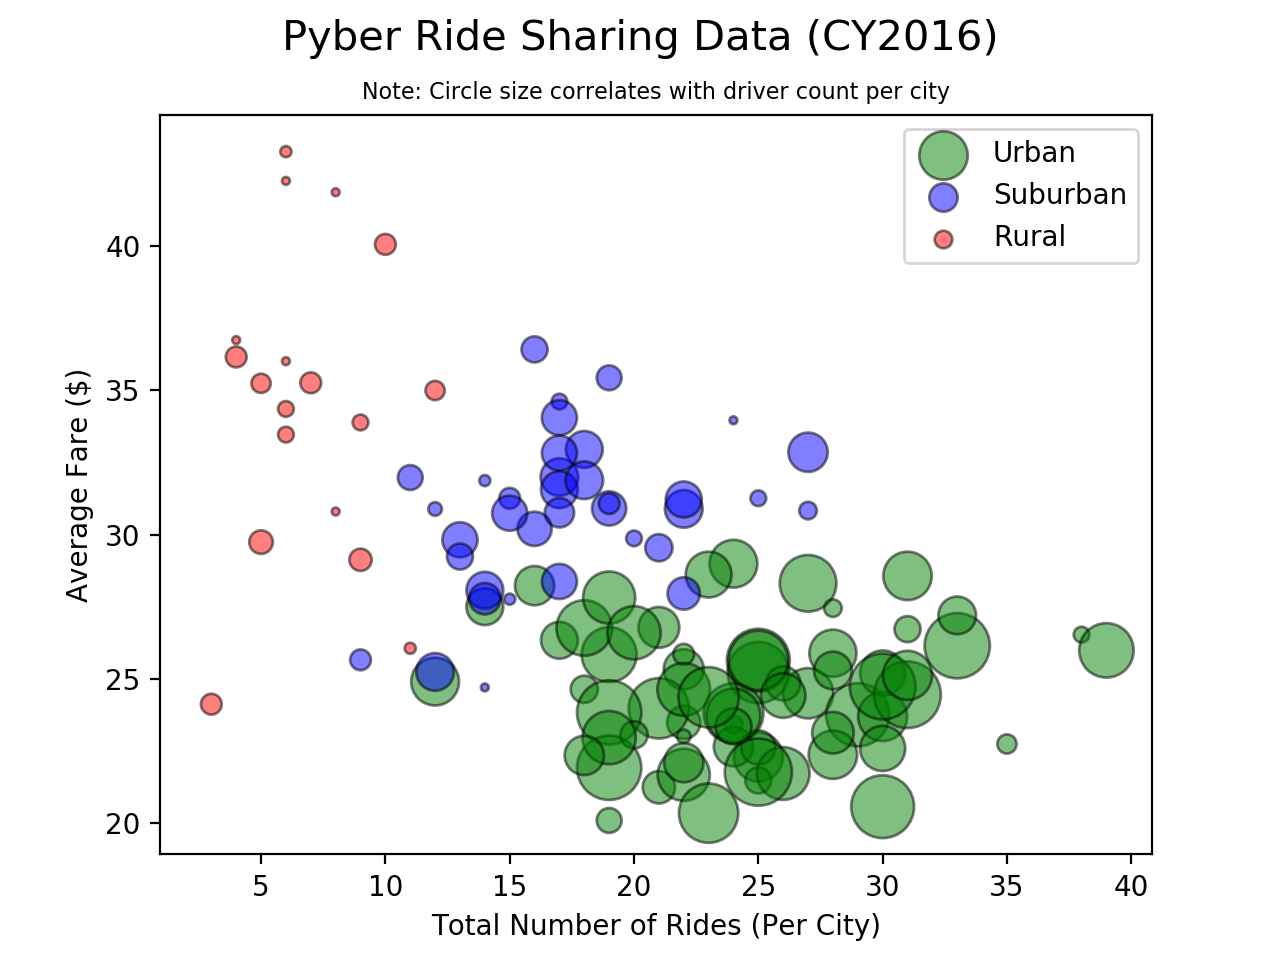

Text(0.5,1,'Note: Circle size correlates with driver count per city')

In [71]:
import seaborn as sns
#Urban Plot
u_x = urban_df['number_of_rides']
u_y = urban_df['average_fare']
u_z = urban_df['number_of_drivers']

#Suburban Plot
s_x = suburban_df['number_of_rides']
s_y = suburban_df['average_fare']
s_z = suburban_df['number_of_drivers']

#Rural Plot
r_x = rural_df['number_of_rides']
r_y = rural_df['average_fare']
r_z = rural_df['number_of_drivers']

plt.scatter(u_x,u_y,s=u_z*8, c="green", alpha=0.5, linewidth=1,edgecolor ='black',label = 'Urban')
plt.scatter(s_x,s_y,s=s_z*8, c="blue", alpha=0.5, linewidth=1,edgecolor ='black',label = 'Suburban')
plt.scatter(r_x,r_y,s=r_z*8, c="red", alpha=0.5, linewidth=1,edgecolor ='black',label = 'Rural')

plt.suptitle('Pyber Ride Sharing Data (CY2016)',size = 15)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.title('Note: Circle size correlates with driver count per city',size=8)